# Perturbation Exercises

In [18]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import sympy as sp

## Exercise 1

$$x(u) = x(u_0) + x_u(u_0)(u - u_0) + (1/2)x_{uu}(u_0)(u - u_0)^2 + (1/6) x_{uuu}(u_0)(u-u_0)^3$$

where we can derive $x_u, x_{uu}, x_{uuu}$ to be:

$$x_u (u) = -\frac{F_u}{F_x}$$
$$x_{uu} (u) = -\frac{F_{xx}(x_u)^2 +2*F_{xu}*x_u +F_{uu}}{F_x}$$
$$x_{uuu} (u) = -\frac{F_{xxx}(x_u)^3+3(F_{xxu}*(x_u)^2 + F_{xuu}*(x_u) + F_{xu}*(x_{uu}) + F_{xx}*(x_{uu}*x_u)) +F_{uuu} }{F_x}$$

## Exercise 2

** Question:**

Consider the following static general equlibrim model.  Firms have a demand for labor curve given by $n^d = \left[\frac{(1-\alpha)z}{w}\right]^{\tfrac{1}{\alpha}} k$, where $z$ is the level of technology, $w$ is the wage rate, $k$ is a fixed capital stock, and $\alpha$ is a capital share parameter from a Cobb-Douglas production function.  Given this, the profits earned by the firm are $\pi = zk^\alpha (n^d)^{1-\alpha} - w n^d$.  The supply of labor by households is $n^s = h - \frac{b}{w(1+b)}(wh+\pi-t)$, where $h$ is the time endowment of the household, is $t$ is a lump-sum tax, and $b$ is a weight in utility on leisure versus consumption of goods.  Assuming a unit measure of both households and firms, use the following parameter values $\alpha = .33$, $k=5$, $z=1$, $b=2$, $t=.1$ and $h=24$.

Find the market-clearing wage rate using $\texttt{fsolve}$.  Find a first-order approxmation for wage as a function of $k$.  Approximate about $k=5$.  

Find a second-order approximation also about $k=5$.

Set up a grid on the space between $k=1$ and $k=15$. Use $\texttt{fsolve}$ to find the equilibrium value of the wage at each point on the grid.

Plot the grid solution, the linear and quadratic approximations on the same graph.

In [22]:
## All the parameters
α = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24

# Hyper parameters
k_min = 1
k_max = 15
nstep = 50

In [23]:
## First, second, and third order derivative and approximations
def f_d(f, x, d = 1e-2):
    return (f(x + d)- f(x - d))/(2*d)
    
def s_d(f, x, d = 1e-2):
    return (f(x + d)+ f(x - d) - 2*f(x))/(d**2)

def t_d(f, x, d = 1e-2):
    return (f(x + 2*d) - 2 * f(x+d) + 2*f(x-d)-f(x-2*d))/(2*(d**3))

def f_apprx(f, x0, x):
     return f(x0) + f_d(f, x0)*(x - x0) 
    
def s_apprx(f, x0, x):
    return f(x0) + f_d(f, x0)*(x - x0) + 0.5* s_d(f,x0)*(x - x0) ** 2

def t_apprx(f, x0, x):
    return f(x0) + f_d(f, x0)*(x - x0) + 0.5* s_d(f,x0)*(x - x0) ** 2 + 1/6* t_d(f,x0)*(x - x0) ** 3

In [24]:
## All equations
w, k = sp.var('w k')

labor_demand = ((1-α)*z/w)**(1/α)*k
firm_profit = (z*k**α*(labor_demand)**(1-α)-w*labor_demand)
labor_supply = h - (b/(w*(1+b)))*(w*h+firm_profit-t)
errors = labor_demand - labor_supply

excess = sp.lambdify([k, w],errors, 'numpy')

def get_w_for_given_k(k):
    temp_f = lambda w: excess(k, w)
    return opt.fsolve(temp_f, 0.1)[0]

# choose approximation point
k0 = 7.
eps = .01

#  use fsolve to find equlibrium wage
w0 = get_w_for_given_k(k0)
print ('w0: ', w0)

#  check solution
check = excess(k0, w0)
print ('check: ', check)

#f = lambda k: get_w_for_given_k(k)

w0:  0.7013562264098258
check:  0.0


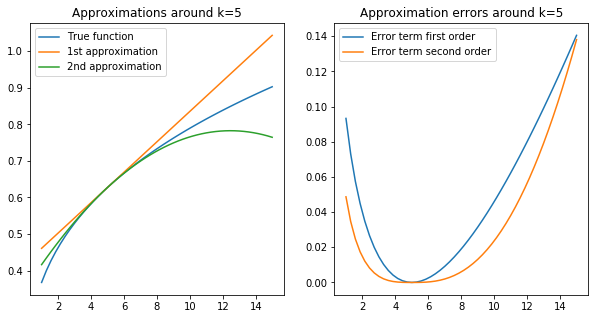

In [25]:
def get_apprx_plots(k_1):
    k_grid = np.linspace(k_min, k_max, num=nstep)
    w_true =np.zeros_like(k_grid)
    w_first = np.zeros_like(k_grid)
    w_second =np.zeros_like(k_grid)
    for i in range(k_grid.shape[0]):
        w_true[i] = (get_w_for_given_k(k_grid[i]))
        w_first[i] = f_apprx(get_w_for_given_k, k_1, k_grid[i])
        w_second[i] = s_apprx(get_w_for_given_k, k_1, k_grid[i])


    fig = plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(k_grid, np.array(w_true), label = 'True function')
    plt.plot(k_grid, np.array(w_first), label = '1st approximation')
    plt.plot(k_grid, np.array(w_second), label = '2nd approximation')
    plt.legend()
    plt.title('Approximations around k={}'.format(k_1))

    difference_1 = np.abs(w_first - w_true)
    difference_2 = np.abs(w_second - w_true)
    plt.subplot(1,2,2)
    plt.plot(k_grid, difference_1, label  = "Error term first order")
    plt.plot(k_grid, difference_2, label  = "Error term second order")
    plt.legend()
    plt.title('Approximation errors around k={}'.format(k_1))
    return fig

fig = get_apprx_plots(5)
plt.show()

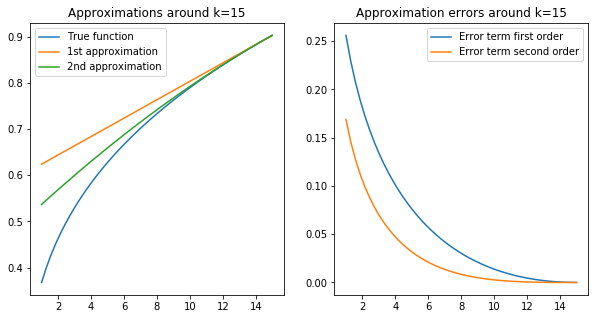

In [26]:
fig = get_apprx_plots(15)
plt.show()

## Problem 3

In [27]:
### Params
x_0 = 100
y_0 = 49.2166
n_grid_points = 50
x_grid = np.linspace(99,101,n_grid_points)
y_grid = np.ones(n_grid_points)*49.

In [28]:
def F(y, x):
    part1 = (x**0.35 + 0.9 * x - y)**(-2.5)
    part2 = 0.95 * (y ** 0.35 + 0.9 * y) ** (-2.5)
    return part1-part2
f = lambda x: opt.fsolve(F, y_0, args = x)

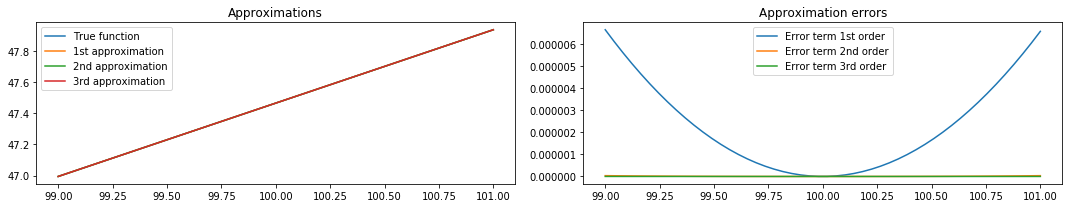

In [29]:
#actual y
for i in range(n_grid_points):
    y_grid[i] = f(x_grid[i])

f_apprx_grid = f_apprx(f, x_0, x_grid)
s_apprx_grid = s_apprx(f, x_0, x_grid)
t_apprx_grid = t_apprx(f, x_0, x_grid)

fig = plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)
plt.plot(x_grid, y_grid, label='True function')
plt.plot(x_grid, f_apprx_grid, label = '1st approximation')
plt.plot(x_grid, s_apprx_grid, label = '2nd approximation')
plt.plot(x_grid, t_apprx_grid, label = '3rd approximation')
plt.title('Approximations')
plt.legend()

difference_1 = np.abs(f_apprx_grid - y_grid)
difference_2 = np.abs(s_apprx_grid - y_grid)
difference_3 = np.abs(t_apprx_grid - y_grid)

plt.subplot(1,2,2)
plt.plot(x_grid, difference_1, label  = "Error term 1st order")
plt.plot(x_grid, difference_2, label  = "Error term 2nd order")
plt.plot(x_grid, difference_3, label  = "Error term 3rd order")
plt.legend()
plt.title('Approximation errors')
plt.tight_layout()
plt.show()

## Problem 4

In [15]:
# Parameters
alpha = 0.35
beta = 0.98

#kgrid
kbar = (alpha * beta)**(1/(1-alpha))
kgrid = np.linspace(0.5*kbar, 1.5*kbar, 25)

In [16]:
### Gruesome derivatives
Fy = lambda k:alpha*beta*(k**(alpha - 1))/(k**alpha - k)
Fx = lambda k:-alpha*beta*(k**(alpha - 1))*(alpha + kbar**(alpha - 1))/(k**alpha - k)
Fu = lambda k:alpha**2*beta*(k**(alpha - 1))**2/(k**alpha - k)
Fyy = lambda k:2*alpha*beta*(k**(alpha - 1))/(k**alpha - k)**2
Fyu = lambda k:alpha**2*beta*(k**(alpha - 1)**2)/(k**alpha - k)**2
Fyx = lambda k:alpha*beta*(k**alpha)*(k**(alpha - 1)*(1+ alpha - (alpha + 1)*k**(alpha - 1)))/(k**alpha - k)**3  
Fxx = lambda k:alpha*beta*(k**alpha)*2*((k**(alpha - 1)**3) + (alpha**2 + 3*alpha - 4)*\
          (k**(alpha - 1)**2)- 2*(2*alpha - 1)*(k**(alpha-1)) - alpha**2 + alpha)/(k**alpha - k)**3
Fxu = lambda k:-alpha**2*beta*(k**(alpha - 1)**2)*(k**(alpha - 1) + (alpha - 1))/(k**alpha - k)**2
Fuu = lambda k:alpha**2*(alpha - 1)*beta*(k**(2*alpha - 3))/(k**alpha - k)

def get_deriv(kbar):
    xu = -(Fx(kbar) + np.sqrt(Fx(kbar)**2 - 4*Fu(kbar)*Fy(kbar)))/(2*Fy(kbar))
    xuu = -(Fyy(kbar)*(xu**4) + 2*Fyx(kbar)*(xu**3) + 2*Fyu(kbar)*(xu**2) + Fxx(kbar)*(xu**2) +\
            2*Fxu(kbar)*xu + Fuu(kbar))/(Fy(kbar)*(xu**2) + Fy(kbar)*xu + Fx(kbar))
    
    return xu, xuu
xu, xuu = get_deriv(kbar)
true_grid = alpha*beta*(kgrid**alpha)
f_apprx_grid = kbar + xu*(kgrid - kbar)
s_apprx_grid = kbar + xu*(kgrid - kbar) + 0.5*xuu*(kgrid - kbar)**2

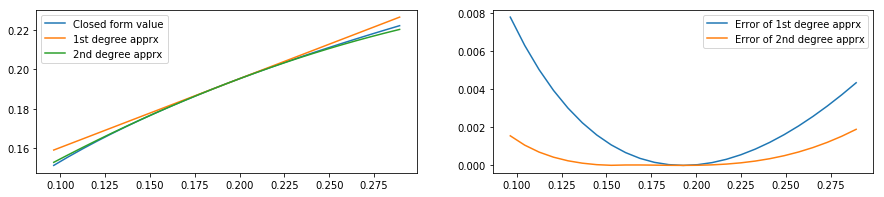

In [17]:
fig = plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)
plt.plot(kgrid, true_grid, label = "Closed form value")
plt.plot(kgrid, f_apprx_grid, label = "1st degree apprx")
plt.plot(kgrid, s_apprx_grid, label = "2nd degree apprx")
plt.legend()

plt.subplot(1, 2, 2)
difference_1 = np.abs( f_apprx_grid - true_grid)
difference_2 = np.abs(s_apprx_grid - true_grid)
plt.plot(kgrid, difference_1, label = "Error of 1st degree apprx")
plt.plot(kgrid, difference_2, label = "Error of 2nd degree apprx")
plt.legend()
plt.show()